In [1]:
from keras.datasets import mnist
from keras.models import Model
from keras import layers
import keras
import matplotlib.pyplot  as plt

In [2]:
# Load data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Data attributes
print("train_images dimentions: ", train_images.ndim)
print("train_images shape: ", train_images.shape)
print("train_images type: ", train_images.dtype)

X_train = train_images.reshape(60000, 28, 28, 1)
X_test = test_images.reshape(10000, 28, 28, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

11501568/11490434 [==============================] - 0s 0us/step
train_images dimentions:  3
train_images shape:  (60000, 28, 28)
train_images type:  uint8


In [5]:
from keras.utils import np_utils
Y_train = np_utils.to_categorical(train_labels)
Y_test = np_utils.to_categorical(test_labels)

In [6]:
Y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [7]:
# Creating our model
myInput = layers.Input(shape=(28,28,1))
conv1 = layers.Conv2D(16, (3,3), activation='relu', padding='same', strides=2)(myInput)
pool1 = layers.MaxPool2D(pool_size=(2,2))(conv1)
conv2 = layers.Conv2D(32, (3,3), activation='relu', padding='same', strides=2)(pool1)
pool2 = layers.MaxPool2D(pool_size=(2,2))(conv2)
flat = layers.Flatten()(pool2)
out_layer = layers.Dense(10, activation='softmax')(flat)

myModel = Model(myInput, out_layer)

myModel.summary()
myModel.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 14, 14, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 7, 7, 16)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 4, 4, 32)          4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 2, 2, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                1290  

In [8]:
network_history = myModel.fit(X_train, Y_train, epochs=20, validation_split=0.2)

Epoch 1/20
1500/1500 [==============================] - 25s 7ms/step - loss: 0.8155 - accuracy: 0.7520 - val_loss: 0.1498 - val_accuracy: 0.9546
Epoch 2/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1479 - accuracy: 0.9542 - val_loss: 0.1142 - val_accuracy: 0.9657
Epoch 3/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1109 - accuracy: 0.9665 - val_loss: 0.0985 - val_accuracy: 0.9715
Epoch 4/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0896 - accuracy: 0.9728 - val_loss: 0.0855 - val_accuracy: 0.9739
Epoch 5/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0825 - accuracy: 0.9754 - val_loss: 0.0843 - val_accuracy: 0.9753
Epoch 6/20
1500/1500 [==============================] - 10s 6ms/step - loss: 0.0709 - accuracy: 0.9785 - val_loss: 0.0773 - val_accuracy: 0.9761
Epoch 7/20
1500/1500 [==============================] - 10s 6ms/step - loss: 0.0699 - accuracy: 0.9779 - val_loss: 0.0858 - val_accur

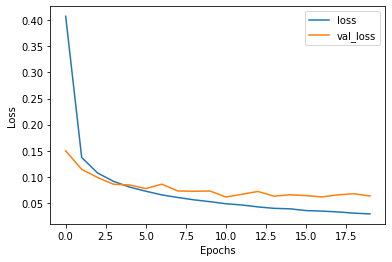

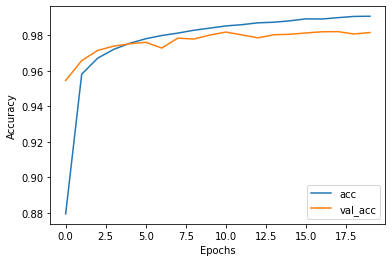

In [9]:
#Draw Plot
import matplotlib.pyplot as plt
history = network_history.history
losses = history['loss']
val_losses = history['val_loss']
accuracies = history['accuracy']
val_accuracies = history['val_accuracy']
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(losses)
plt.plot(val_losses)
plt.legend(['loss', 'val_loss'])
    
plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(accuracies)
plt.plot(val_accuracies)
plt.legend(['acc', 'val_acc'])

In [10]:
# Evaluation
test_loss, test_acc = myModel.evaluate(X_test, Y_test)
print('test_loss = ' + str(test_loss))
print('test_acc = ' + str (test_acc))

313/313 [==============================] - 1s 3ms/step - loss: 0.0527 - accuracy: 0.9827
test_loss = 0.05265941098332405
test_acc = 0.982699990272522


In [11]:
test_labels_p = myModel.predict(X_test)
test_labels_p

array([[2.4877360e-13, 1.2536473e-09, 1.0184070e-06, ..., 9.9999893e-01,
        4.0581136e-10, 2.1692122e-10],
       [4.2846682e-09, 3.3247129e-08, 1.0000000e+00, ..., 6.3481089e-13,
        7.0166255e-11, 4.8589876e-14],
       [1.2379314e-05, 9.9989080e-01, 1.1836245e-06, ..., 2.1086478e-05,
        7.2219086e-07, 3.2616727e-09],
       ...,
       [2.8180583e-13, 5.7195332e-11, 3.1487641e-13, ..., 3.9257729e-06,
        1.0520927e-06, 5.7475683e-07],
       [1.5081243e-08, 2.3750042e-11, 1.0106323e-10, ..., 2.8553193e-12,
        1.2417817e-04, 1.0485659e-08],
       [2.2905213e-07, 1.8931624e-11, 2.3878870e-06, ..., 1.2868347e-08,
        1.2855593e-06, 6.0068657e-09]], dtype=float32)

In [12]:
import numpy as np
test_labels_p = np.argmax(test_labels_p, axis=1)
test_labels_p

array([7, 2, 1, ..., 4, 5, 6])